<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Mental_Health_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

This dataset contains survey responses from patients regarding various symptoms associated with depression. Each patient answered 14 questions, and the responses are coded from 1 to 6 based on the frequency of experiencing each symptom. Additionally, the dataset includes a column indicating the patient's overall depression state.

# Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, make_scorer
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis, gaussian_kde
%matplotlib inline
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer


# Data Importation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Personal Projects/Deepression.csv")

# Data Head

In [ ]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


# SID-Analysis

## Shape

In [ ]:
df.shape

(813, 16)

## Info


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

## De-Stats

In [ ]:
df.describe()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,813.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,407.000000,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,234.837178,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,610.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,813.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


# Data Preprocessing

## Numerical Vs Categorical

In [ ]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

# Display numerical and categorical variables
print("Numerical Variables:")
print(numerical_vars)
print()

print("Categorical Variables:")
print(categorical_vars)

Numerical Variables:
Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy'],
      dtype='object')

Categorical Variables:
Index(['Depression State'], dtype='object')


## Missing Data

In [ ]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [ ]:
# Calculate the percentage of missing data for each column
missing_data_percentages = df.isnull().mean() * 100

# Format the percentages to 2 decimal places with % symbol
formatted_percentages = missing_data_percentages.apply(lambda x: f"{x:.2f}%")

print(formatted_percentages)

Number                0.00%
Sleep                33.58%
Appetite             33.58%
Interest             33.58%
Fatigue              33.58%
Worthlessness        33.58%
Concentration        33.58%
Agitation            33.58%
Suicidal Ideation    33.58%
Sleep Disturbance    33.58%
Aggression           33.58%
Panic Attacks        33.58%
Hopelessness         33.58%
Restlessness         33.58%
Low Energy           33.58%
Depression State     33.58%
dtype: object


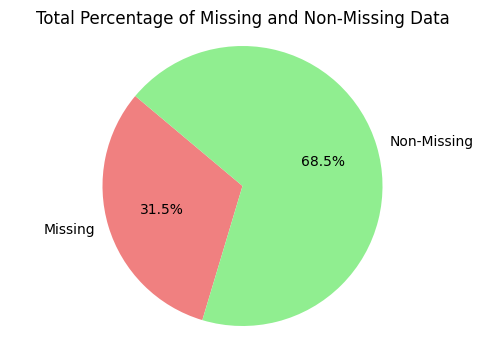

In [ ]:

def plot_total_data_availability(df):
    total_missing = 0
    total_non_missing = 0

    # Calculate the total missing and non-missing percentages
    for data in df:
        total_missing += data.isnull().sum().sum()
        total_non_missing += (data.size - data.isnull().sum().sum())

    # Calculate the total values
    total_values = total_missing + total_non_missing

    # Calculate the percentages
    total_percentage_missing = (total_missing / total_values) * 100
    total_percentage_non_missing = (total_non_missing / total_values) * 100

    # Plot the pie chart
    labels = ['Missing', 'Non-Missing']
    sizes = [total_percentage_missing, total_percentage_non_missing]
    colors = ['lightcoral', 'lightgreen']

    plt.figure(figsize=(6, 4))  # Adjust figure size
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Total Percentage of Missing and Non-Missing Data')

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    plt.show()

# Plot total data availability for all datasets
plot_total_data_availability([df])

## Handling Missing Data


Handle Missing Data

---
Depending on the nature of the data and the missingness, different imputation strategies can be applied.

For this project, consider KNN imputation for numerical data and mode imputation for categorical data (if applicable).

### KNN imputation (Numerical Data)

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:-1]), columns=df.columns[1:-1])

In [ ]:
# Adding back the 'Number' and 'Depression State' columns
df_imputed['Depression State'] = df['Depression State']

In [ ]:
df_imputed.head(2)

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [ ]:
# Verify missingness
df_imputed.isnull().sum()

Sleep                  0
Appetite               0
Interest               0
Fatigue                0
Worthlessness          0
Concentration          0
Agitation              0
Suicidal Ideation      0
Sleep Disturbance      0
Aggression             0
Panic Attacks          0
Hopelessness           0
Restlessness           0
Low Energy             0
Depression State     273
dtype: int64

### Mode imputation (Categorical Data)

In [ ]:
df_imputed["Depression State"].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression', nan], dtype=object)

1. Strip Leading/Trailing Whitespace

In [ ]:
# Strip leading/trailing whitespace characters
df_imputed["Depression State"] = df_imputed["Depression State"].str.strip()


2. Standardize Values

In [ ]:
# Replace entries with specific patterns
df_imputed["Depression State"] = df_imputed["Depression State"].replace({
    '2\tNo depression': 'No depression',
    '5\tNo depression': 'No depression',
    '\tModerate': 'Moderate',
    '\tMild': 'Mild',
    '\tNo depression': 'No depression',
    '\tSevere': 'Severe'
})


3. Check Unique Values Again

In [ ]:
# Verify the unique values after cleaning
unique_values_cleaned = df_imputed["Depression State"].unique()
print(unique_values_cleaned)


['Mild' 'Moderate' 'Severe' 'No depression' nan]


4. Mode Imputation

In [ ]:
# Calculate the mode of the column
mode_value = df_imputed['Depression State'].mode()[0]

# Fill NaN values with the mode
df_imputed['Depression State'] = df_imputed['Depression State'].fillna(mode_value)

# Optionally, print to verify
print(df_imputed['Depression State'].unique())

['Mild' 'Moderate' 'Severe' 'No depression']


5. Map Values

In [ ]:
"""
# Encode categorical target variable if needed (assuming 'Depression State' is the target variable)
df_imputed['Depression State'] = df_imputed['Depression State'].astype('category').cat.codes

In [ ]:
depression_mapping = {
    'No depression': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}
df_imputed['Depression State'] = df_imputed['Depression State'].map(depression_mapping)

6. Check Unique Values again

In [ ]:
# Verify the unique values after cleaning
unique_values_coded = df_imputed["Depression State"].unique()
print(unique_values_coded)


[1 2 3 0]


In [ ]:
depression_mapping.keys()

dict_keys(['No depression', 'Mild', 'Moderate', 'Severe'])

In [ ]:
# Verify missingness
df_imputed.isnull().sum().sum()

0

In [ ]:
# Data head Preview
df_imputed.head(3)

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1
1,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2
2,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3


# EDA

## Symptoms & Depression State

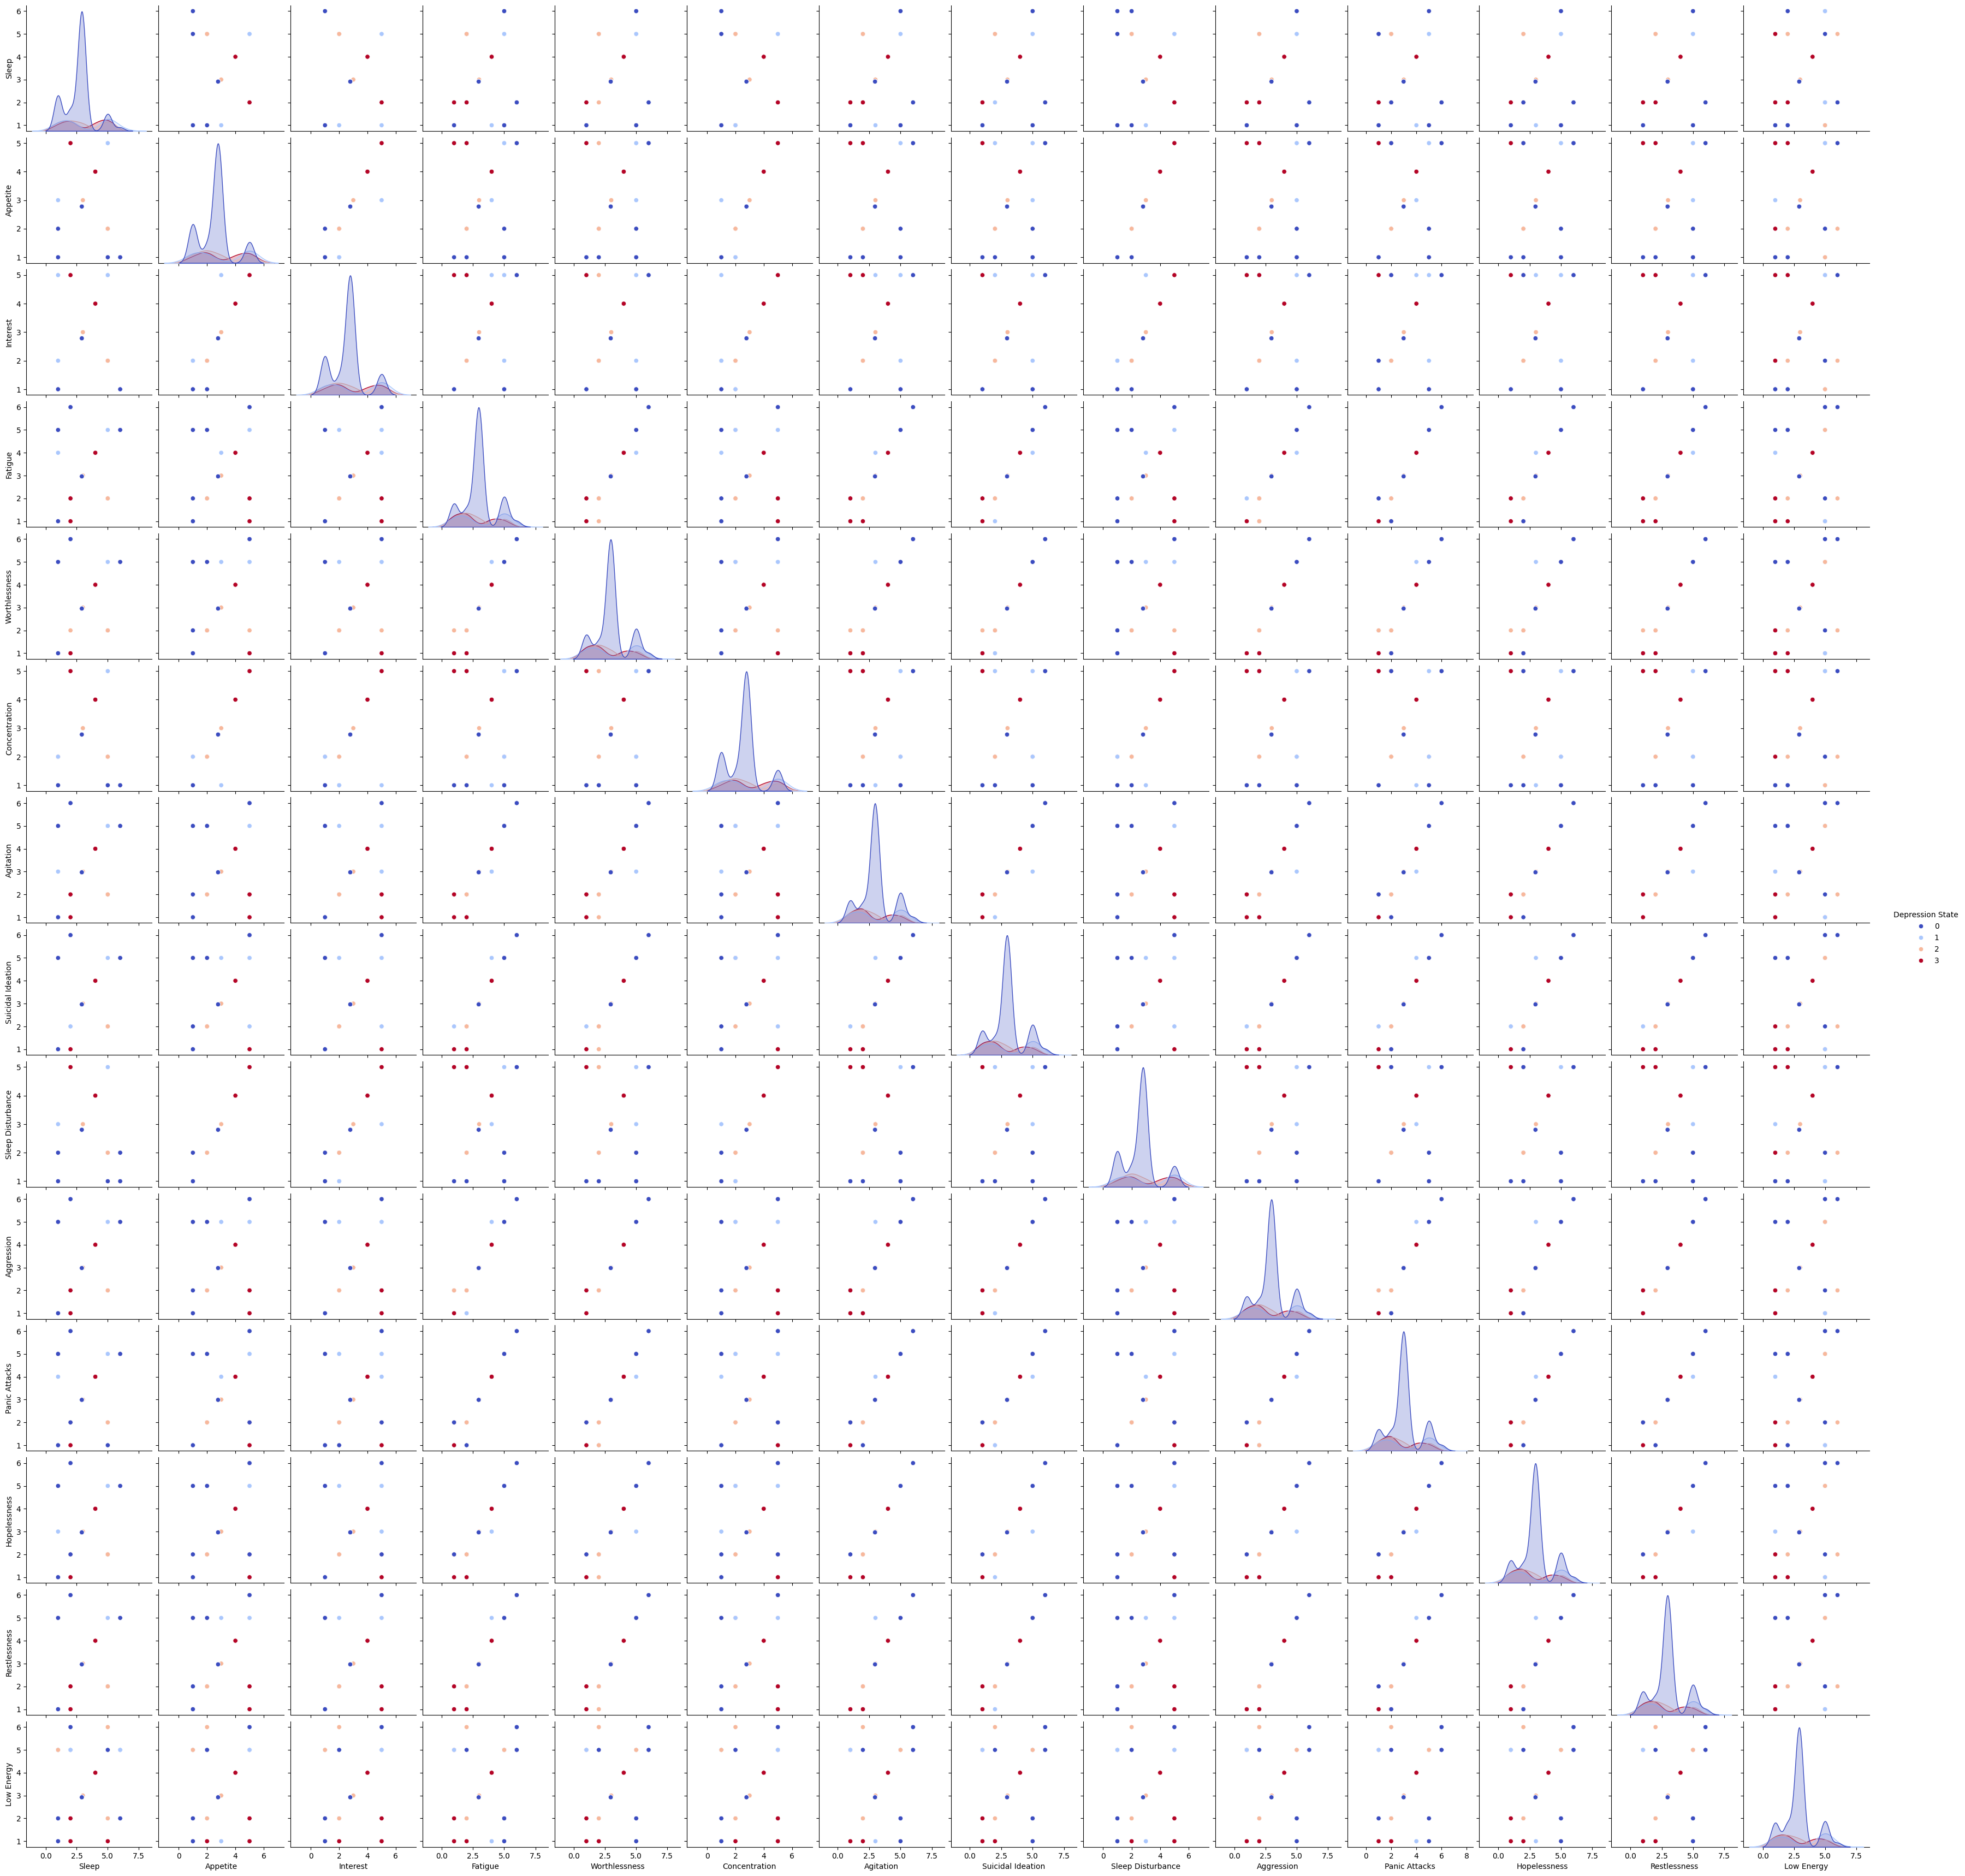

In [ ]:
# Visualize the relationship between symptoms and depression state
sns.pairplot(df_imputed, hue='Depression State', palette='coolwarm')
plt.show()

## Depression State Distribution

<ipython-input-64-2bfab27a91c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imputed, x='Depression State', palette='coolwarm')


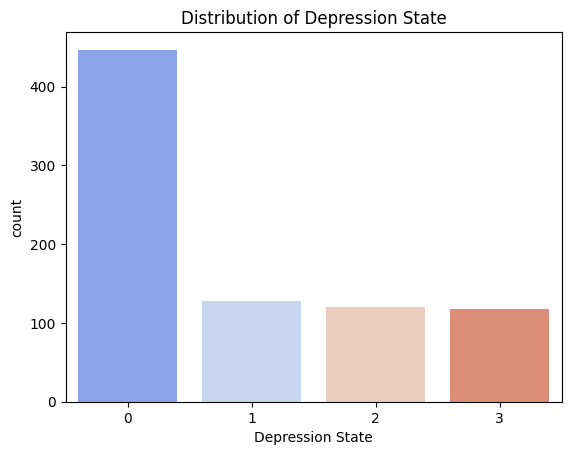

In [ ]:
# Check the distribution of Depression State
sns.countplot(data=df_imputed, x='Depression State', palette='coolwarm')
plt.title('Distribution of Depression State')
plt.show()

## Other Distribution

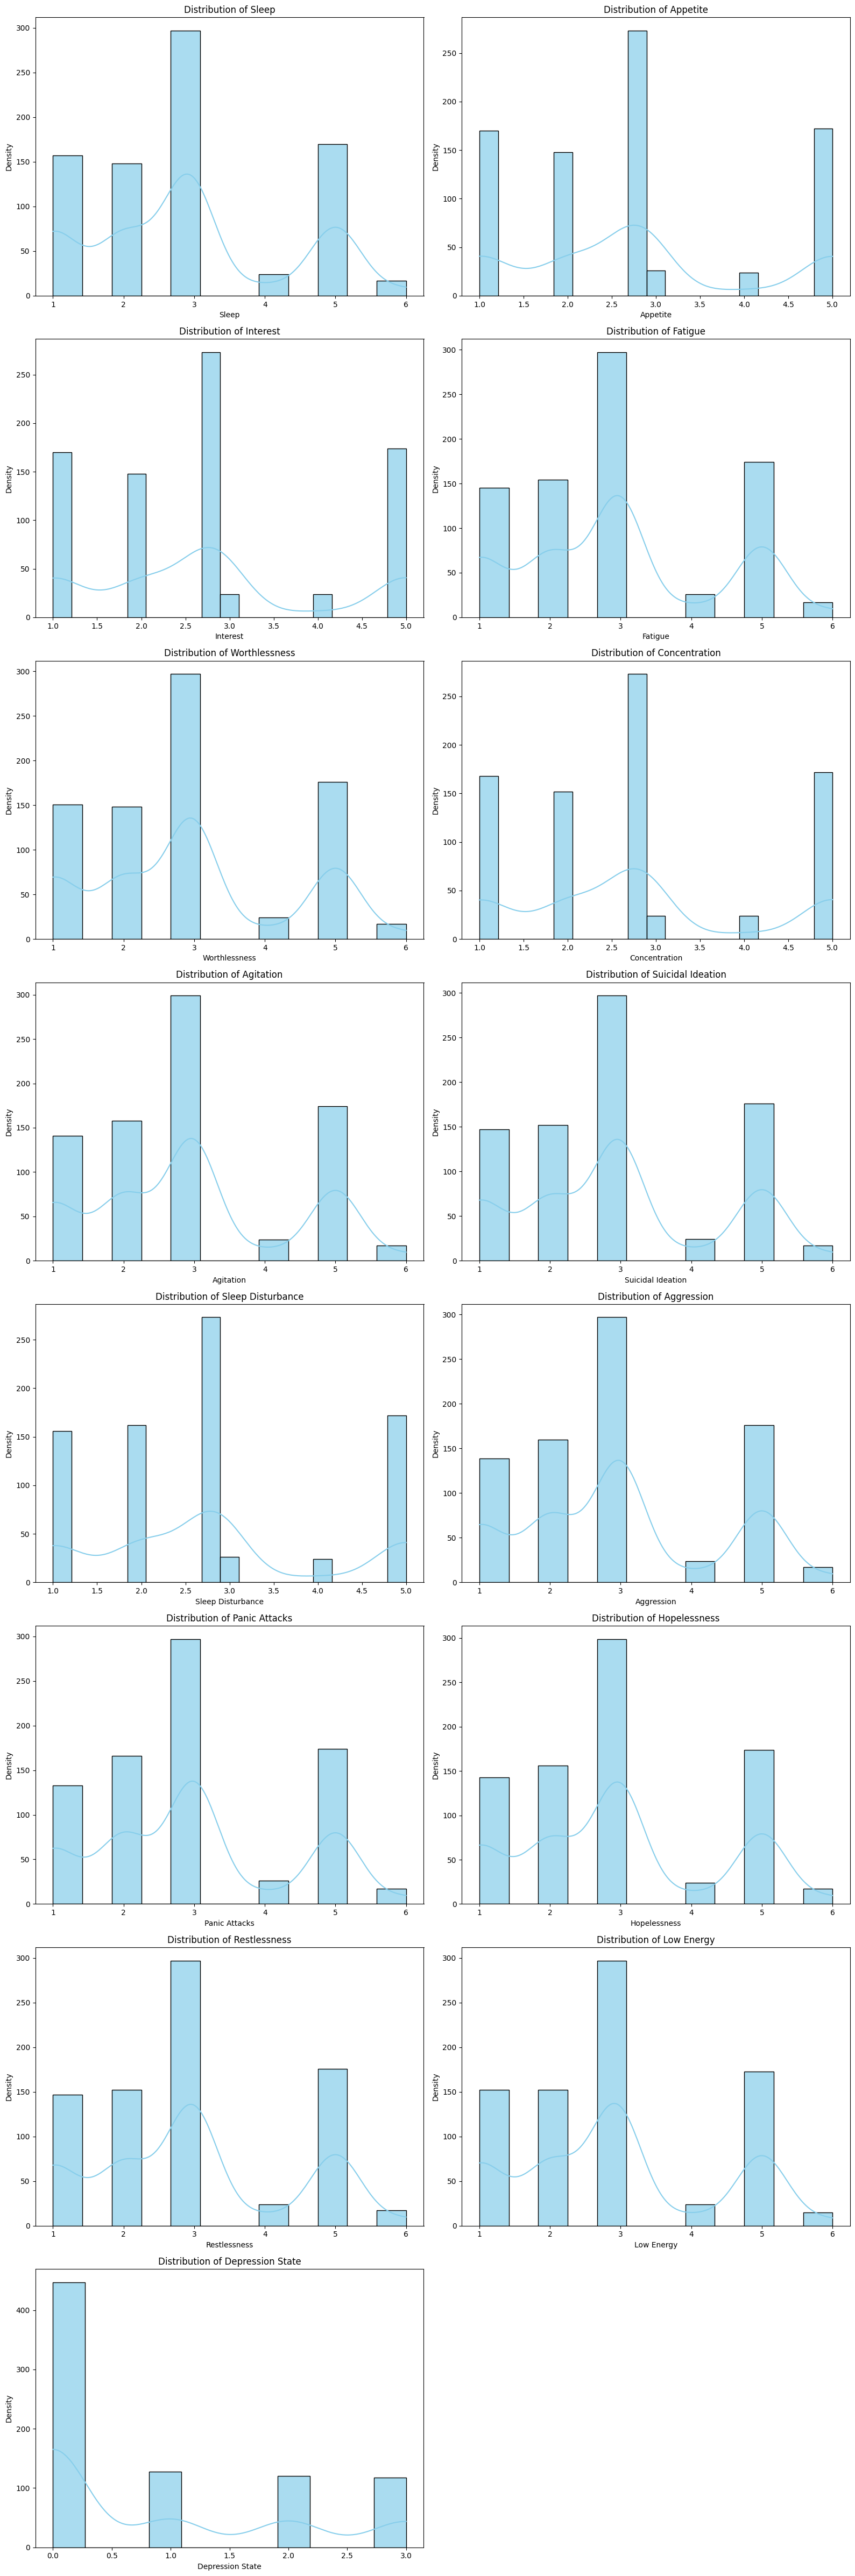

In [ ]:

def plot_feature_distributions(df):
    num_features = len(df.columns)
    rows = (num_features + 1) // 2  # Calculate number of rows needed
    cols = 2  # Fixed 2 columns for the subplot layout

    # Create subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 6 * rows))

    # Flatten axes array for easier iteration
    axes = axes.flatten()

    # Plot distribution for each feature
    for i, column in enumerate(df.columns):
        sns.histplot(df[column].dropna(), kde=True, ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')

    # Remove any empty subplots if there are fewer features than rows*cols
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_feature_distributions(df_imputed)


## Heatmap

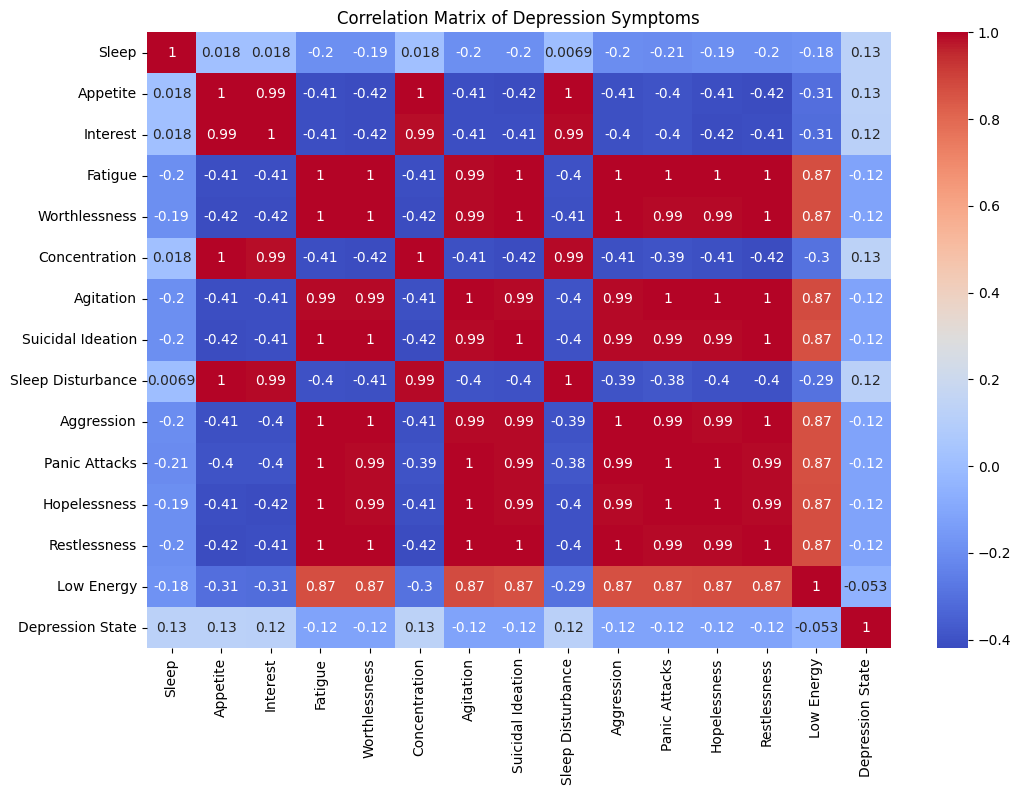

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_imputed.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Depression Symptoms')
plt.show()

## Correlation

<ipython-input-80-a954ba10c185>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_depression.index, y=correlation_with_depression.values, palette='rocket')


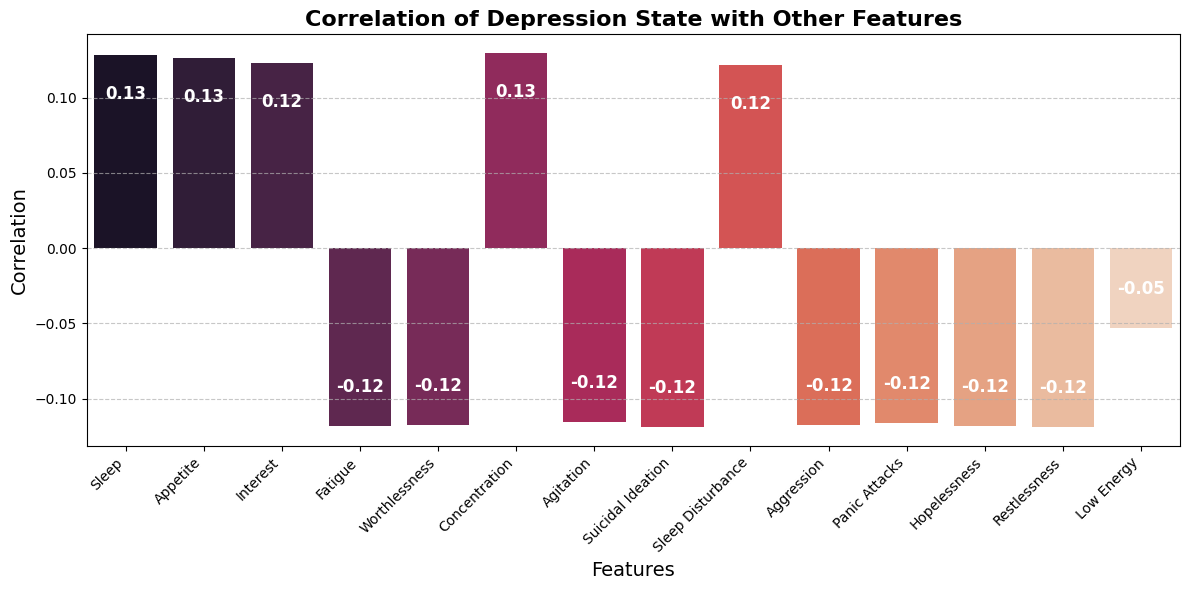

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_imputed.corr()

# Extract correlations with 'Depression State'
correlation_with_depression = correlation_matrix['Depression State'].drop('Depression State')

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Use seaborn's barplot with a bright color palette
sns.barplot(x=correlation_with_depression.index, y=correlation_with_depression.values, palette='rocket')

# Add titles and labels
plt.title('Correlation of Depression State with Other Features', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations inside the bars
for index, value in enumerate(correlation_with_depression.values):
    # For positive values, place the text inside the bar
    if value >= 0:
        plt.text(index, value - 0.02, f'{value:.2f}', ha='center', va='top', fontsize=12, color='white', fontweight='bold')
    # For negative values, place the text inside the bar but in the opposite direction
    else:
        plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

## Matrix Plot

In [ ]:
# Calculate the correlation of each feature with 'Depression State'
corr_series = df_imputed.corrwith(df_imputed['Depression State'])
corr_df = corr_series.to_frame(name='Correlation')

# Reset index and sort by correlation values
corr_df = corr_df.reset_index()
corr_df.columns = ['Feature', 'Correlation']
corr_df_sorted = corr_df.sort_values(by='Correlation', ascending=False)

# Print sorted correlation DataFrame
print(corr_df_sorted)


              Feature  Correlation
14   Depression State     1.000000
5       Concentration     0.129557
0               Sleep     0.128107
1            Appetite     0.126180
2            Interest     0.123101
8   Sleep Disturbance     0.121453
13         Low Energy    -0.053012
6           Agitation    -0.115765
10      Panic Attacks    -0.116061
9          Aggression    -0.117259
4       Worthlessness    -0.117495
3             Fatigue    -0.117851
11       Hopelessness    -0.118145
12       Restlessness    -0.118963
7   Suicidal Ideation    -0.118963


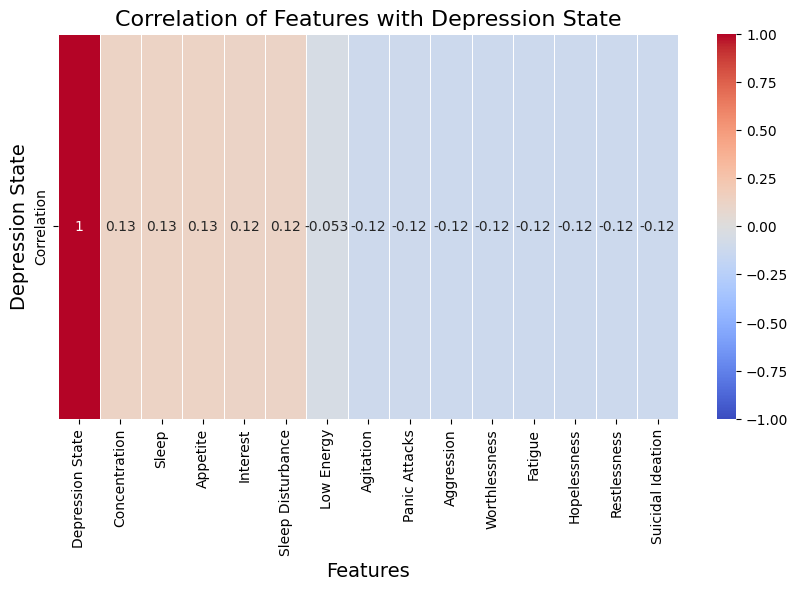

In [ ]:
# Pivot the sorted correlation matrix for heatmap plotting
# Since this is a single row matrix, we can directly plot it
plt.figure(figsize=(10, 5))
sns.heatmap(corr_df_sorted.set_index('Feature').T, annot=True, cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation of Features with Depression State", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Depression State", fontsize=14)
plt.show()


## Outliers

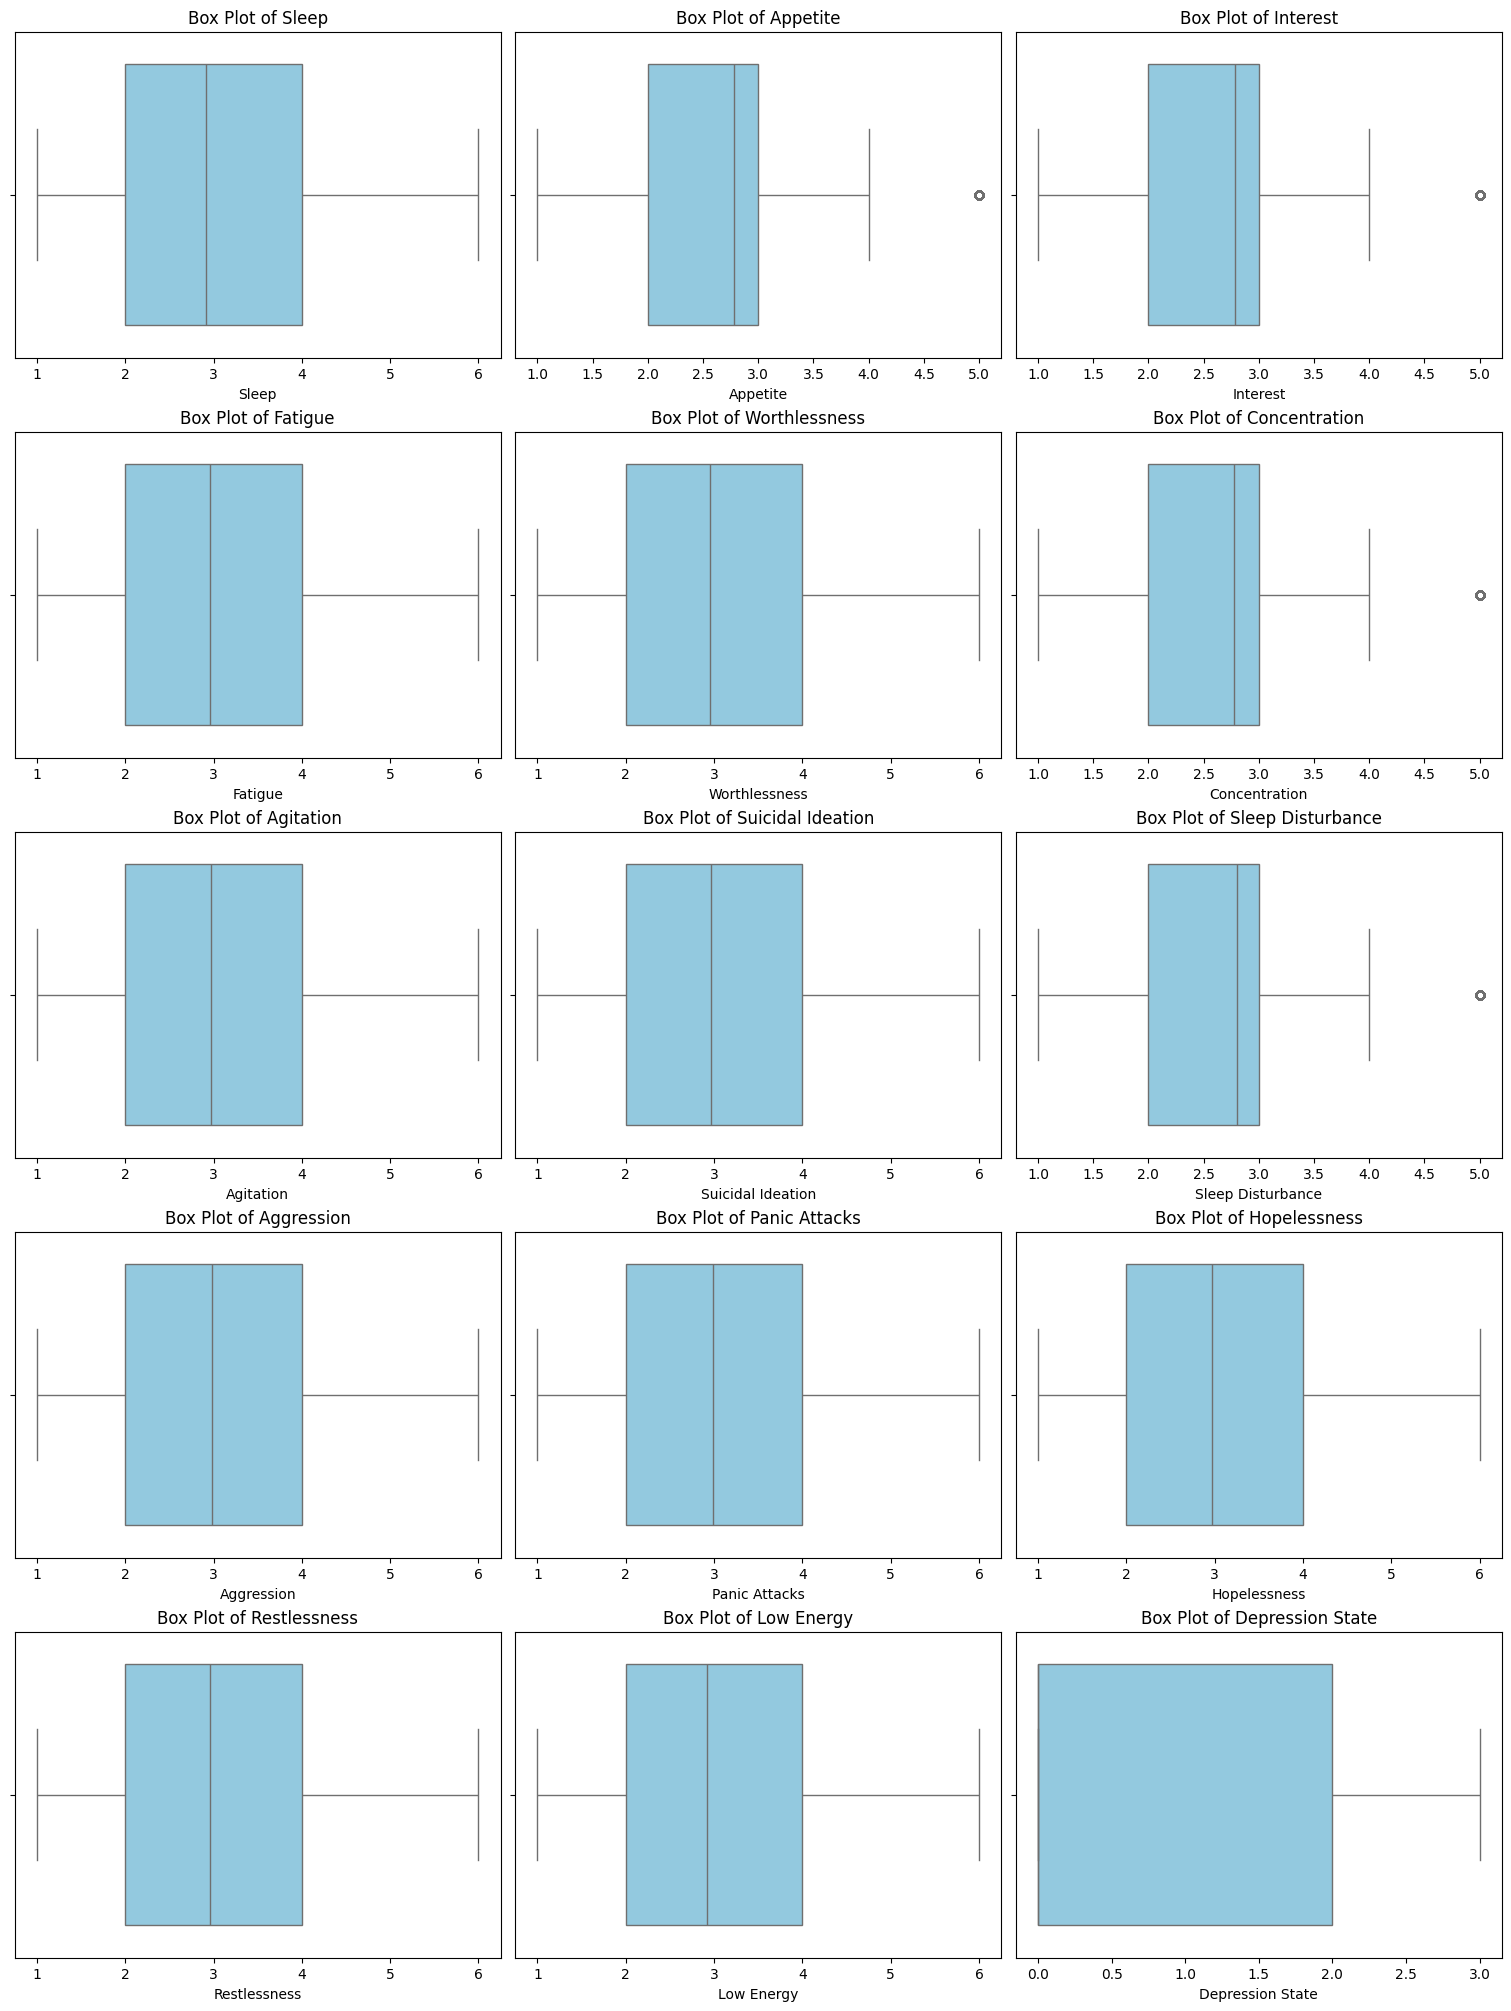

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for the subplots
n_columns = 3  # Number of columns in the subplot grid
n_features = len(df_imputed.columns)  # Total number of features
n_rows = (n_features + n_columns - 1) // n_columns  # Calculate the number of rows needed

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 4 * n_rows), constrained_layout=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(df_imputed.columns):
    sns.boxplot(ax=axes[i], x=df_imputed[column], color='skyblue')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


## Histogram

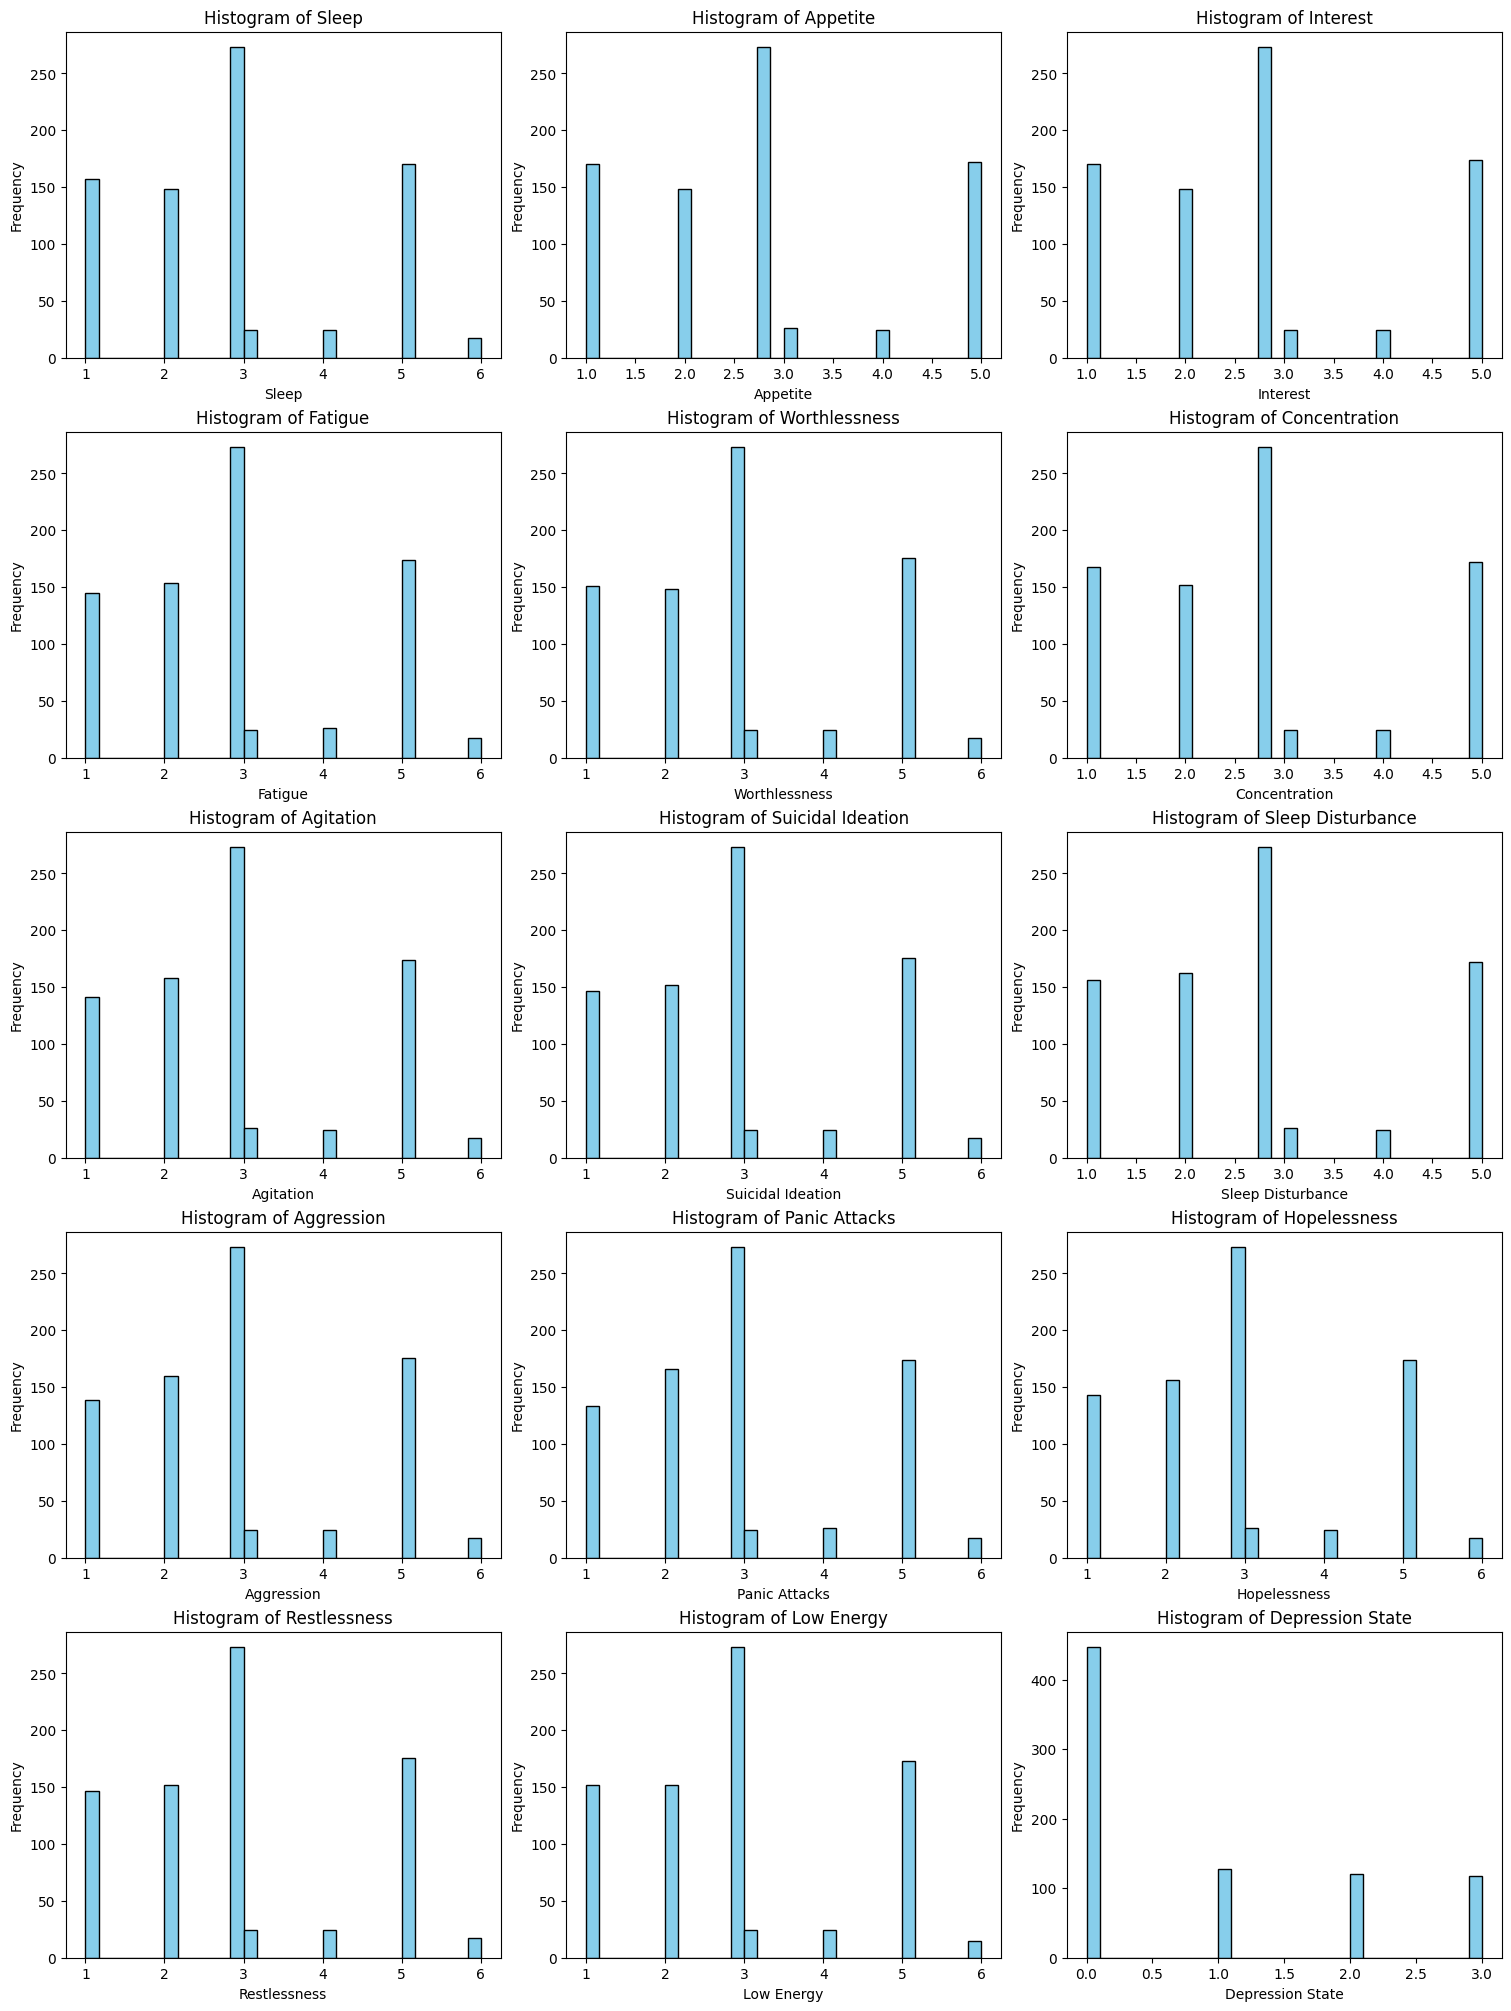

In [ ]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplots
n_columns = 3  # Number of columns in the subplot grid
n_features = len(df_imputed.columns)  # Total number of features
n_rows = (n_features + n_columns - 1) // n_columns  # Calculate the number of rows needed

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 4 * n_rows), constrained_layout=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df_imputed.columns):
    axes[i].hist(df_imputed[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()
